In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/currenciescsv/currencies.csv
/kaggle/input/loancsv/loan.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df=pd.read_csv("../input/loancsv/loan.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# setting to display all rows & columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [5]:
#Top three rows
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Shape of data
df.shape

(39717, 111)

In [7]:
# Percentage wise NA by column name
df.isnull().sum()*100/len(df)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [8]:
# Filetring the column where NA value is less than 50%
df_2 = df.loc[:, df.isin(['NULL',np.nan]).mean() < .5]

In [9]:
# Checking variable percentage of 0 or 0.0
df_2.isin([0,0.0]).mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.003248
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.000000
purpose                       0.000000
title                         0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.004608
delinq_2yrs              

In [10]:
# Removing columns where percentage of 0 or 0.0 are greater than 80%
df_3 = df_2.loc[:, df_2.isin([0, 0.0]).mean() < .8]

In [11]:
# Checking head of lc_data_3
df_3.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,15-Jan,171.62,16-May,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,13-Apr,119.66,13-Sep,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,1-Nov,2,2,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,14-Jun,649.91,16-May,1,INDIVIDUAL


In [12]:
# Checking Null values & data type
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_title            37258 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  verification_status  39717 non-null  object 
 15  issue_d              39717 non-null 

In [13]:
# Number of unique ids
print("Number of unique ids: ", df_3.id.nunique())
#39717

#Number of unique member_ids
print("Number of unique member_ids: ", df_3.member_id.nunique())
#39717

# Number of records
print("Number of records: ", len(df_3))
#39717

# As number of ids == number of member ids == total number of records == 39717
# So no use of keeping "id" & "member_id" column in dataset

# Removing "id" & "member_id"
df_3.drop(['id','member_id'], axis = 1, inplace = True)

df_3.head(3)

Number of unique ids:  39717
Number of unique member_ids:  39717
Number of records:  39717


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,15-Jan,171.62,16-May,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,13-Apr,119.66,13-Sep,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,1-Nov,2,2,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,14-Jun,649.91,16-May,1,INDIVIDUAL


In [14]:
# Checking type of loan status
df.loan_status.value_counts()

#Fully Paid     32950
#Charged Off     5627
#Current         1140

# As we cant make any conclusive outcome regarding Defaulter or Non Defatulter.
# So, better to filter out rows == "Current"

df_4 = df_3[df_3.loan_status != "Current"]

In [15]:
# Checking variable datatypes
df_4.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
url                     object
desc                    object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
revol_bal                int64
revol_util              object
total_acc                int64
initial_list_status     object
total_pymnt            float64
total_pymnt_inv        float64
total_re

In [16]:
df_4.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,13648,83.70%,9,f,5863.155187,5833.84,5000.00,863.16,15-Jan,171.62,16-May,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,Apr-99,5,3,1687,9.40%,4,f,1008.710000,1008.71,456.46,435.17,13-Apr,119.66,13-Sep,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,1-Nov,2,2,2956,98.50%,10,f,3005.666844,3005.67,2400.00,605.67,14-Jun,649.91,16-May,1,INDIVIDUAL


In [17]:
df_4['term'] = list(map(lambda x : int(x.rstrip('months')),df_4['term']))

df_4['int_rate'] = list(map(lambda x : float(x.rstrip('%')),df_4['int_rate']))

df_4['revol_util'] = list(map(lambda x : float(str(x).rstrip('%')),df_4['revol_util']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

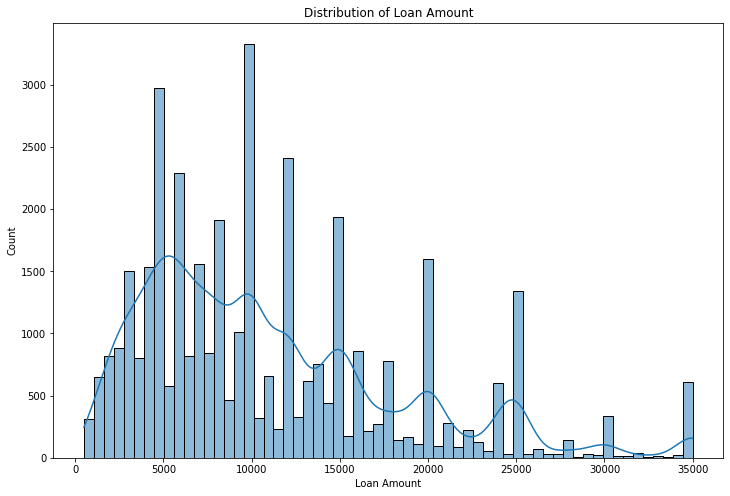

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['loan_amnt'], kde = True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount')
plt.show()

# As expected distribution is right skewed

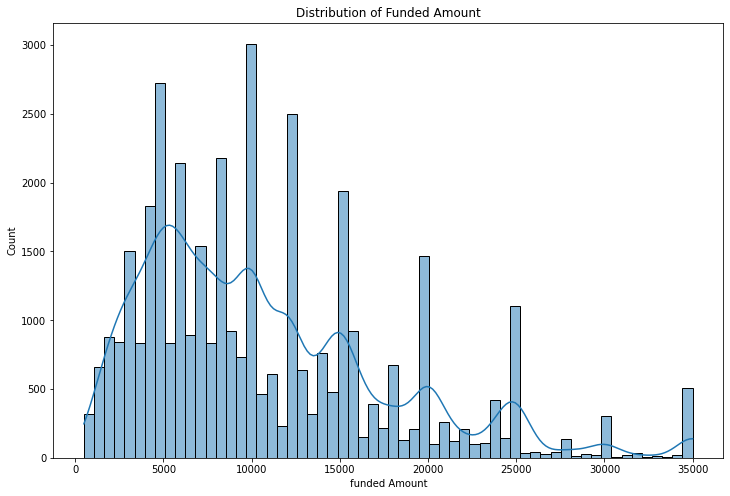

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['funded_amnt'], kde = True)
plt.xlabel('funded Amount')
plt.ylabel('Count')
plt.title('Distribution of Funded Amount')
plt.show()

# As expected distribution is right skewed

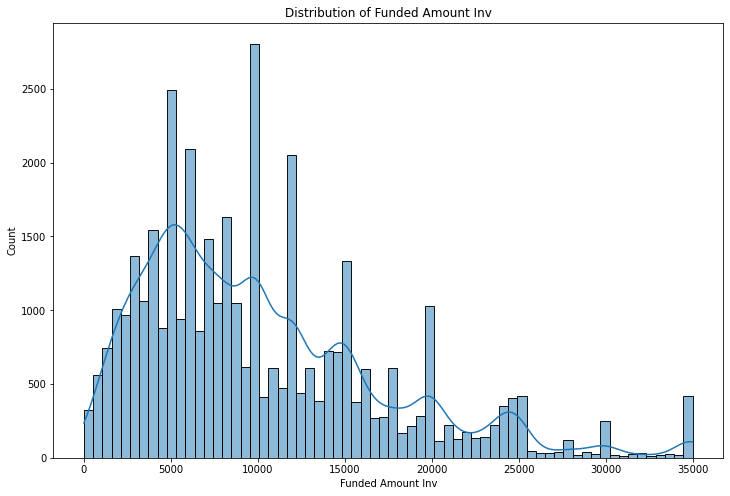

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['funded_amnt_inv'], kde = True)
plt.xlabel('Funded Amount Inv')
plt.ylabel('Count')
plt.title('Distribution of Funded Amount Inv')
plt.show()

# As expected distribution is right skewed

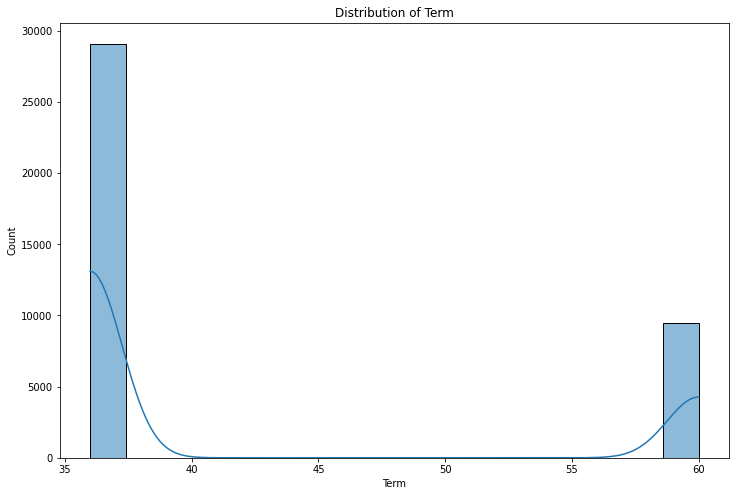

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['term'], kde = True)
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term')
plt.show()
### 5. Distribution of Annual Income

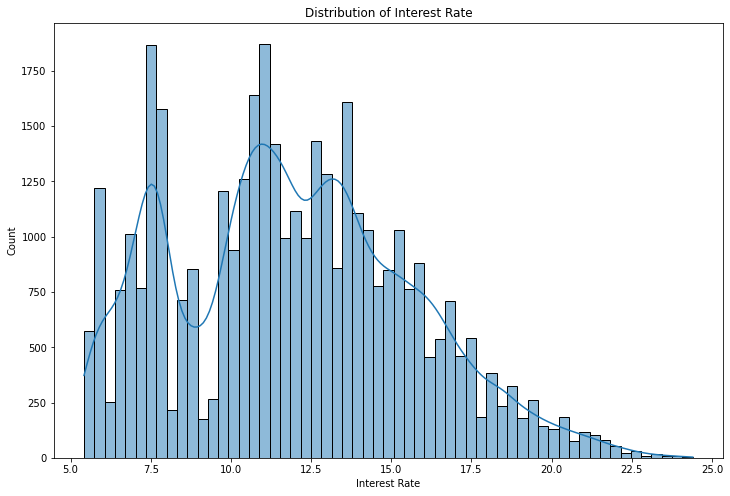

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['int_rate'], kde = True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate')
plt.show()

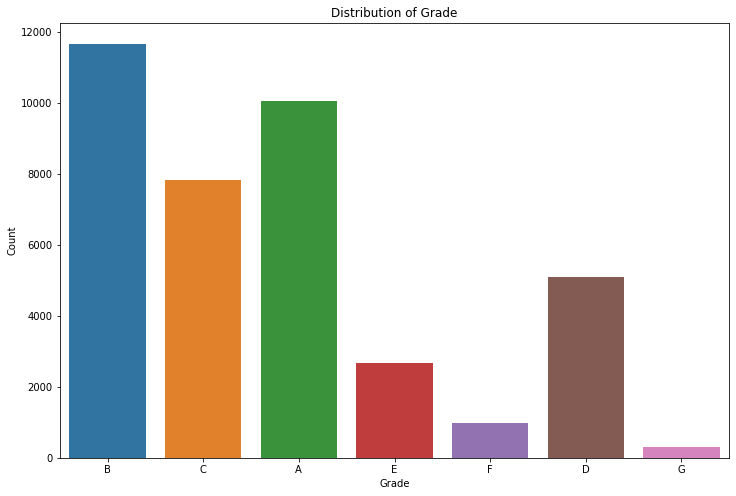

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['grade'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grade')
plt.show()

# Lesser understanding of Grade
# No use, better to remove

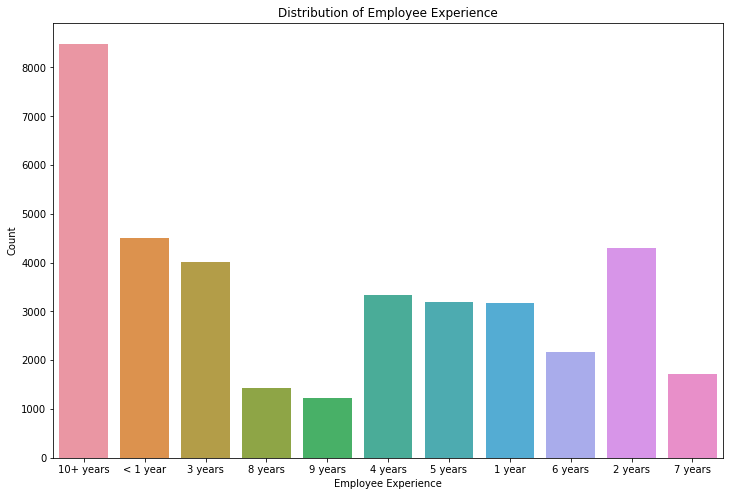

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['emp_length'])
plt.xlabel('Employee Experience')
plt.ylabel('Count')
plt.title('Distribution of Employee Experience')
plt.show()

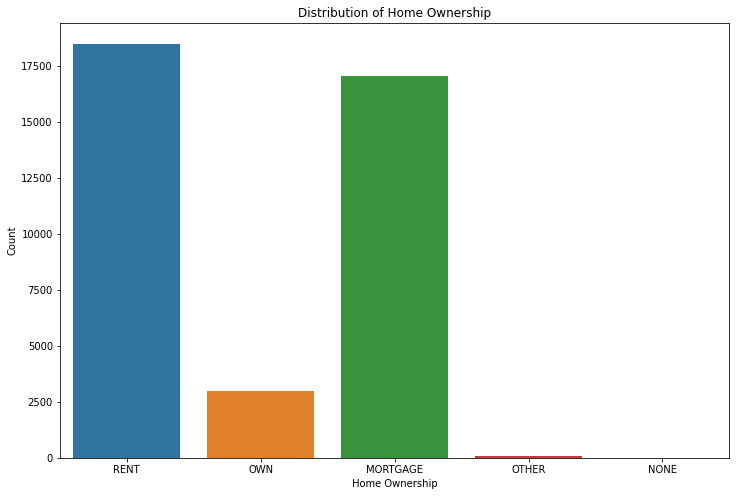

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['home_ownership'])
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.show()

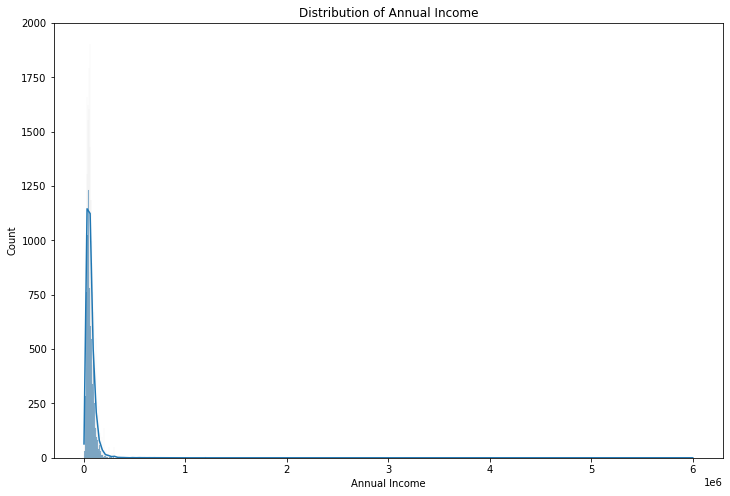

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['annual_inc'], kde = True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')
plt.show()

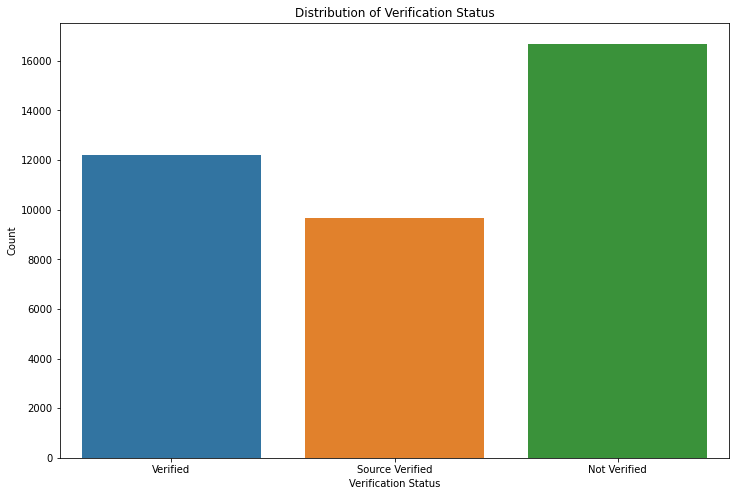

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['verification_status'])
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status')
plt.show()

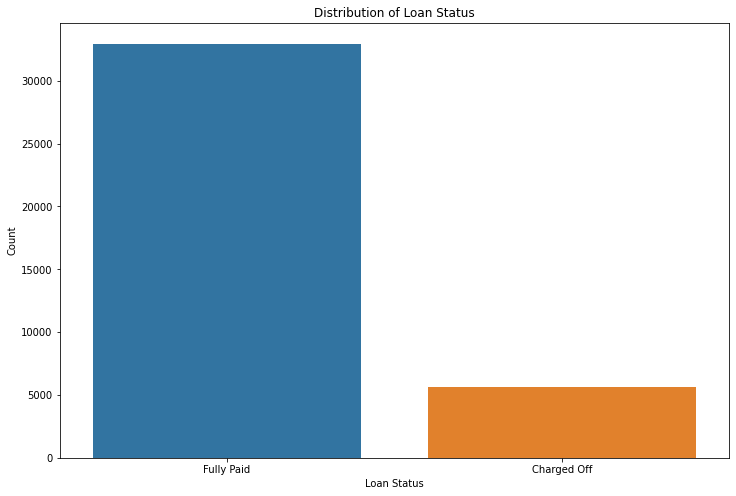

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['loan_status'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

# Its a very important feature shows that, defatulters are peoples who Charged off

In [29]:
print("Number of unique Payment Plan: ", df_4.pymnt_plan.nunique())
#39717

Number of unique Payment Plan:  1


In [30]:
print("Number of unique url: ", df_4.url.nunique())
#38577

Number of unique url:  38577


In [31]:
print("Number of unique description: ", df_3.desc.nunique())
#26527

Number of unique description:  26527


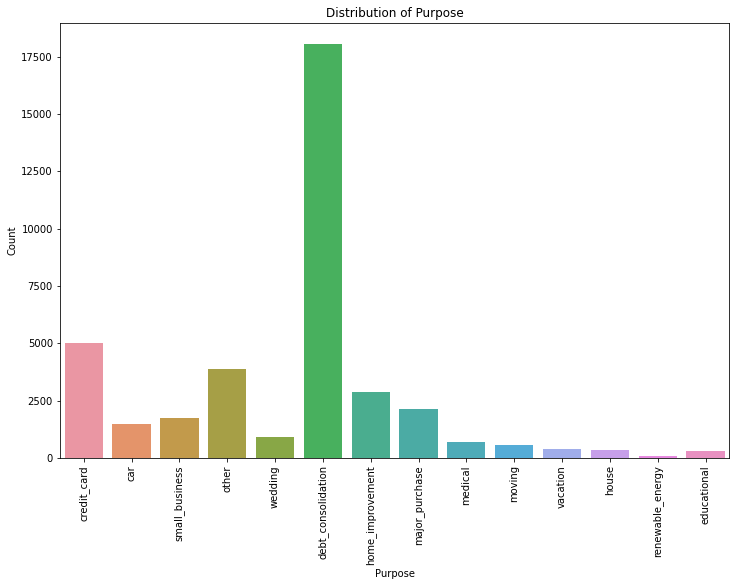

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['purpose'])
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Distribution of Purpose')
plt.show()

# Its a very important feature shows that, defatulters 

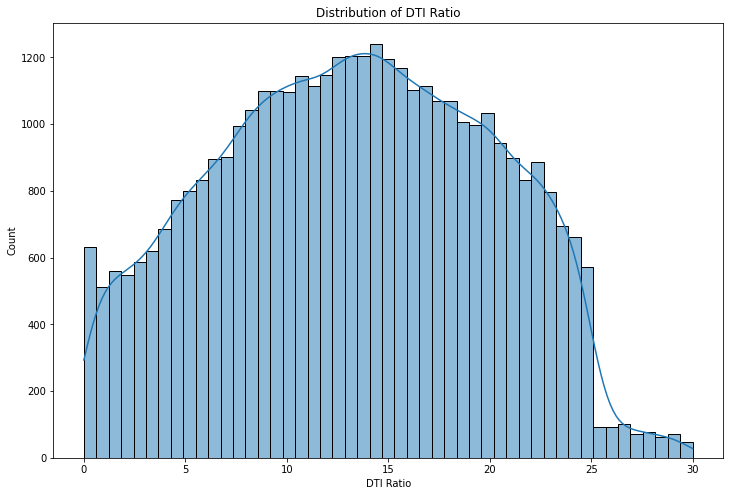

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['dti'], kde = True)
plt.xlabel('DTI Ratio')
plt.ylabel('Count')
plt.title('Distribution of DTI Ratio')
plt.show()

# Showing bell curve, futher investigation required

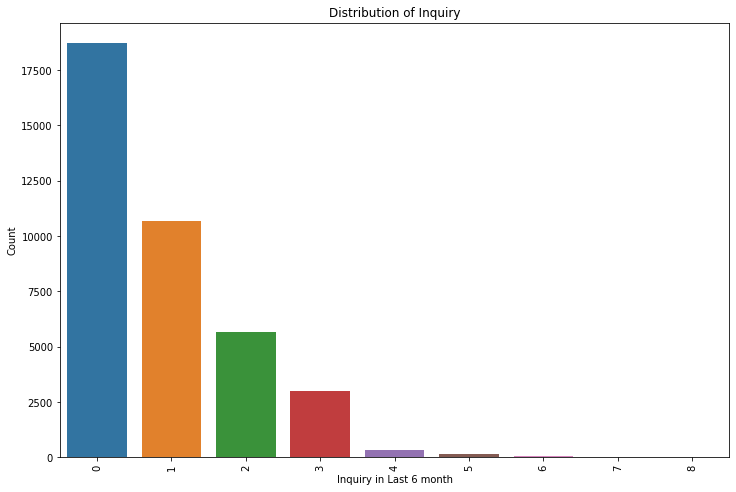

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['inq_last_6mths'])
plt.xlabel('Inquiry in Last 6 month')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Distribution of Inquiry')
plt.show()

# Its a very important feature shows that, defatulters 

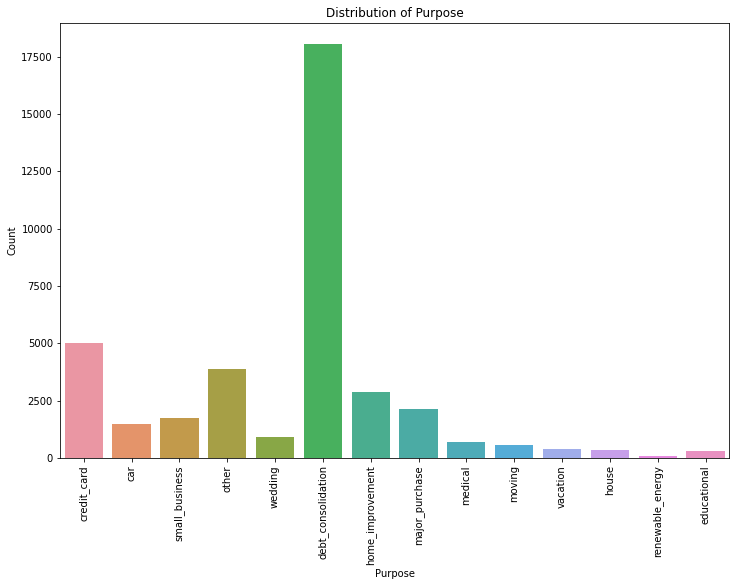

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['purpose'])
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Distribution of Purpose')
plt.show()

# Its a very important feature shows that, defatulters 

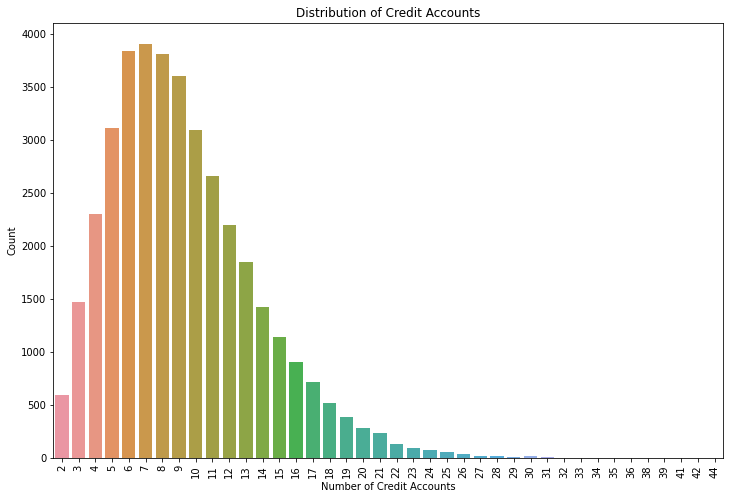

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x = df_4['open_acc'])
plt.xlabel('Number of Credit Accounts')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Distribution of Credit Accounts')
plt.show()

# Its a very important feature shows that, defatulters 

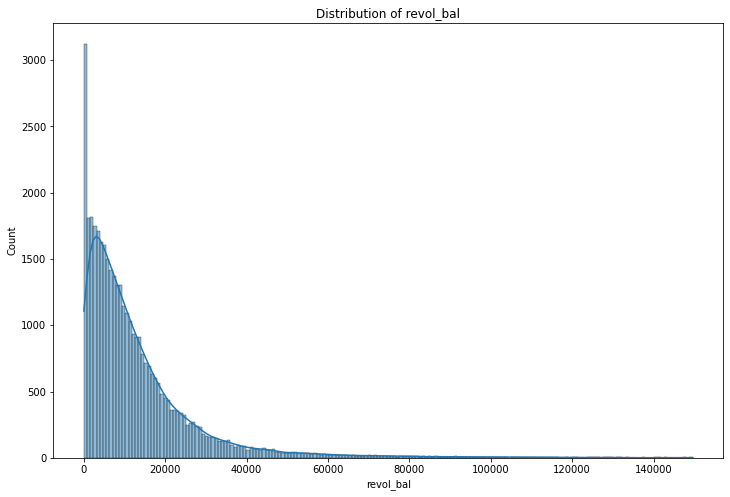

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['revol_bal'], kde = True)
plt.xlabel('revol_bal')
plt.ylabel('Count')
plt.title('Distribution of revol_bal')
plt.show()

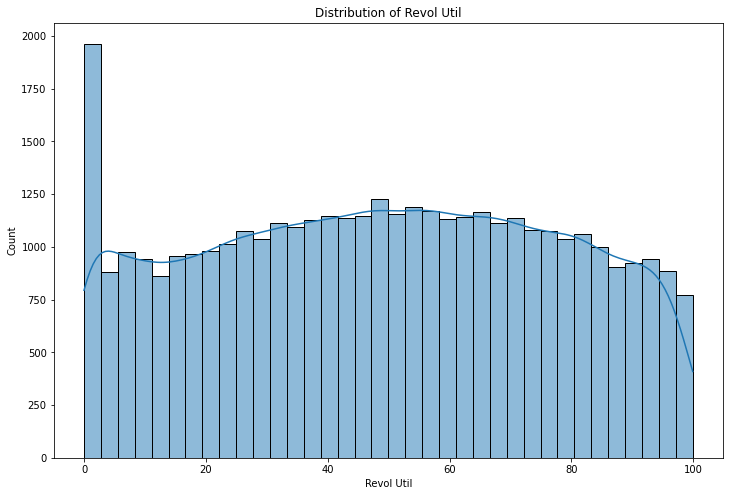

In [38]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['revol_util'], kde = True)
plt.xlabel('Revol Util')
plt.ylabel('Count')
plt.title('Distribution of Revol Util')
plt.show()

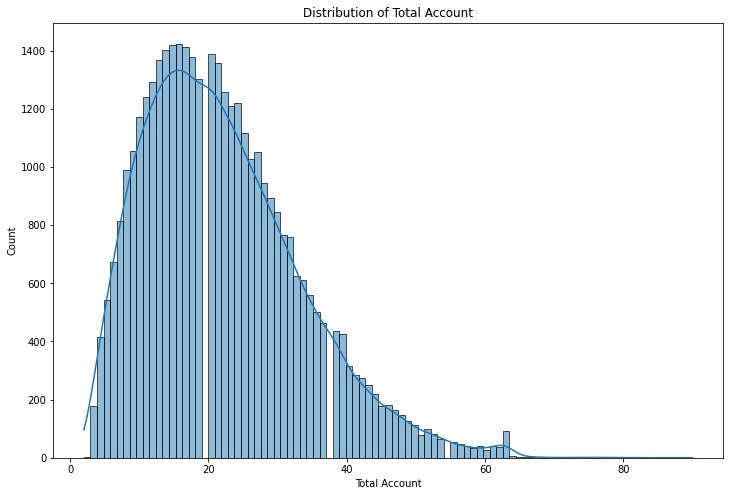

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['total_acc'], kde = True)
plt.xlabel('Total Account')
plt.ylabel('Count')
plt.title('Distribution of Total Account')
plt.show()

In [40]:
# Number of unique initial_list_status
print("Number of unique initial_list_status: ", df_4.initial_list_status.nunique())
#1

Number of unique initial_list_status:  1


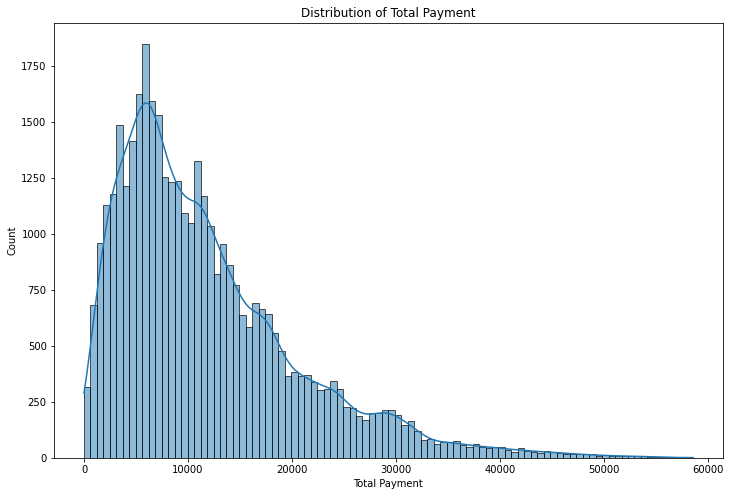

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['total_pymnt'], kde = True)
plt.xlabel('Total Payment')
plt.ylabel('Count')
plt.title('Distribution of Total Payment')
plt.show()

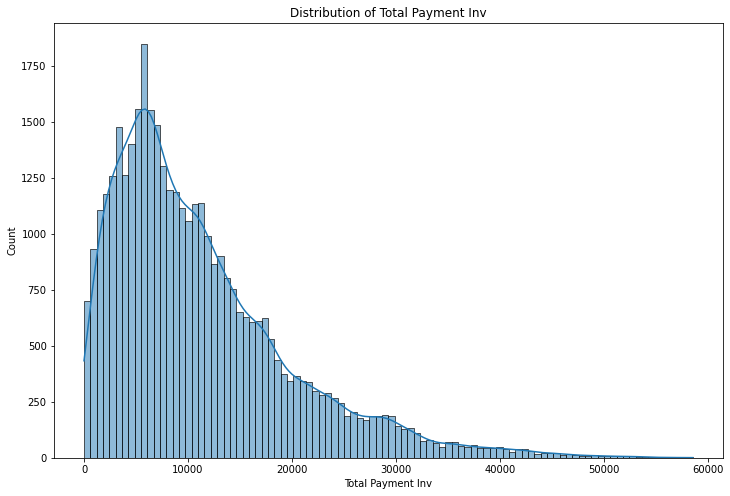

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['total_pymnt_inv'], kde = True)
plt.xlabel('Total Payment Inv')
plt.ylabel('Count')
plt.title('Distribution of Total Payment Inv')
plt.show()

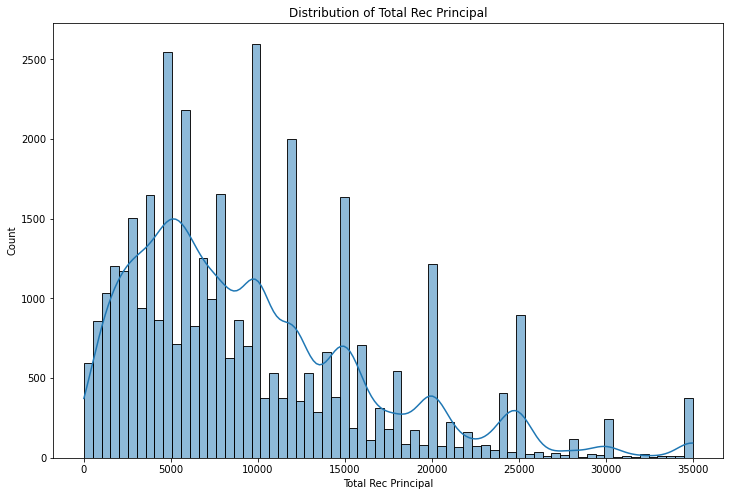

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['total_rec_prncp'], kde = True)
plt.xlabel('Total Rec Principal')
plt.ylabel('Count')
plt.title('Distribution of Total Rec Principal')
plt.show()

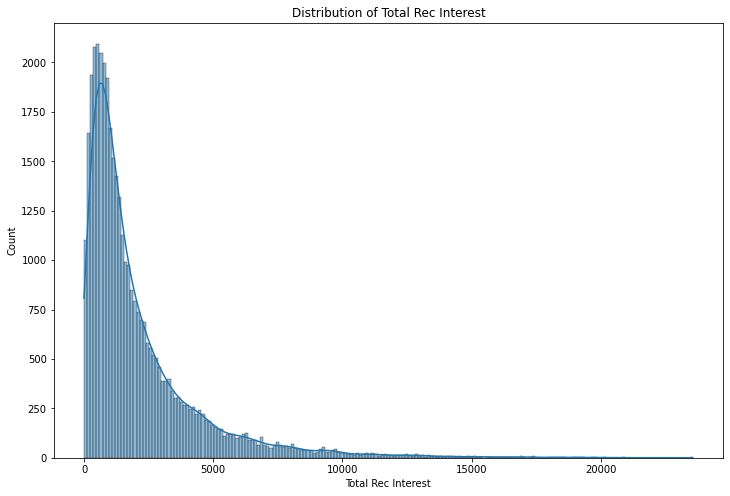

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['total_rec_int'], kde = True)
plt.xlabel('Total Rec Interest')
plt.ylabel('Count')
plt.title('Distribution of Total Rec Interest')
plt.show()

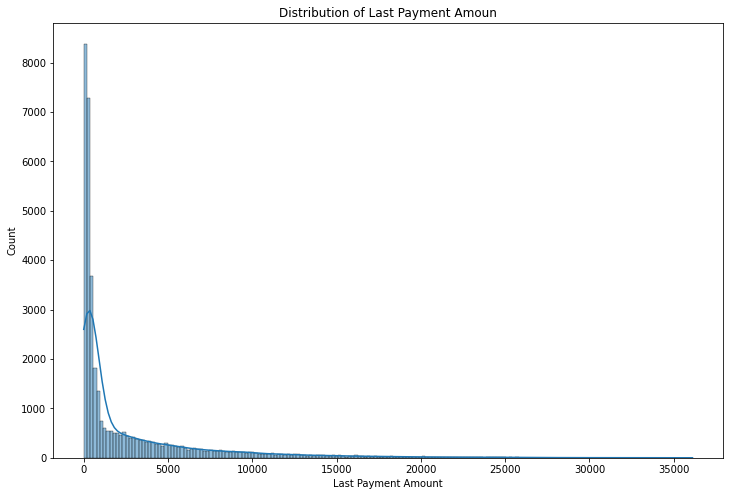

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(df_4['last_pymnt_amnt'], kde = True)
plt.xlabel('Last Payment Amount')
plt.ylabel('Count')
plt.title('Distribution of Last Payment Amoun')
plt.show()

In [46]:
#lc_data_4.policy_code.value_counts()
#1    38577
print("Number of unique policy_code: ", df_4.policy_code.nunique())
# Nothing conclusive need to remove

Number of unique policy_code:  1


In [47]:
df_5 = df_4.drop(['emp_title','grade', 'sub_grade','title','issue_d','pymnt_plan','url','desc','zip_code',
                            'addr_state', 'earliest_cr_line','initial_list_status','last_pymnt_d',
                            'last_credit_pull_d', 'policy_code','application_type'], axis = 1)

In [48]:
df_5.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,1,3,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,171.62
1,2500,2500,2500.0,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,5,3,1687,9.4,4,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,2,2,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,649.91


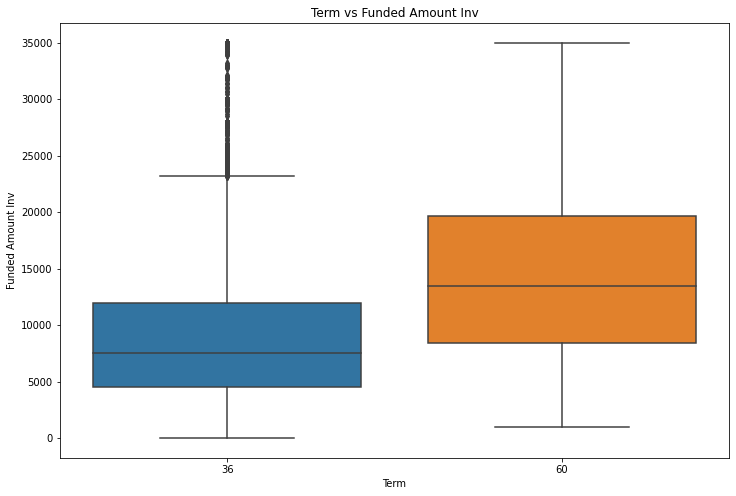

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['term'], y = df_5['funded_amnt_inv'])
plt.xlabel('Term')
plt.ylabel('Funded Amount Inv')
plt.title('Term vs Funded Amount Inv')
plt.show()

# Note: too much outlier in term = 36

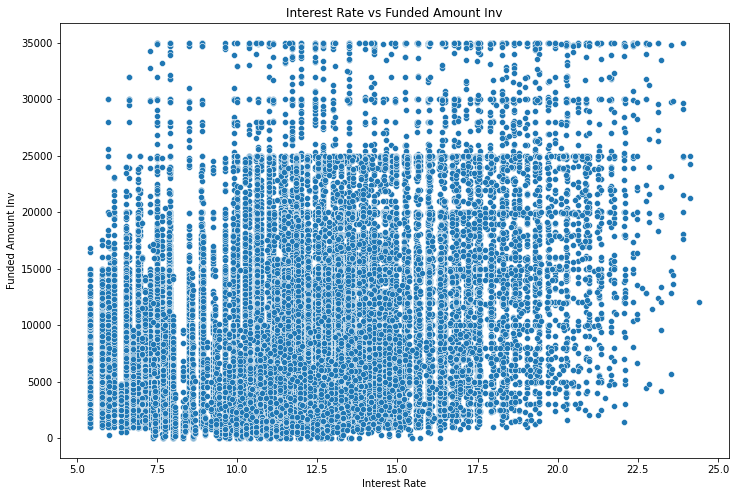

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df_5['int_rate'], y = df_5['funded_amnt_inv'])
plt.xlabel('Interest Rate')
plt.ylabel('Funded Amount Inv')
plt.title('Interest Rate vs Funded Amount Inv')
plt.show()

# Nothing conclusive

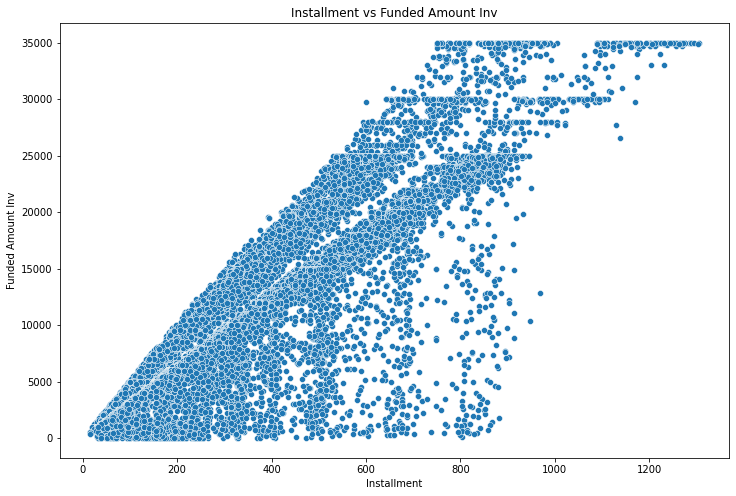

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df_5['installment'], y = df_5['funded_amnt_inv'])
plt.xlabel('Installment')
plt.ylabel('Funded Amount Inv')
plt.title('Installment vs Funded Amount Inv')
plt.show()

# It's very intuitive, as funded amount increases, installment also increases

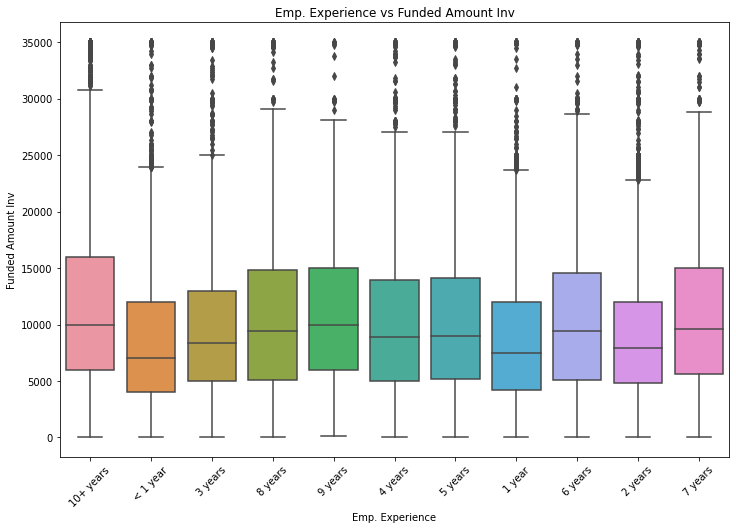

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['emp_length'], y = df_5['funded_amnt_inv'])
plt.xlabel('Emp. Experience')
plt.ylabel('Funded Amount Inv')
plt.title('Emp. Experience vs Funded Amount Inv')
plt.xticks(rotation = 45)
plt.show()

# Note: Median of funded amount is almost same, but all have outliers

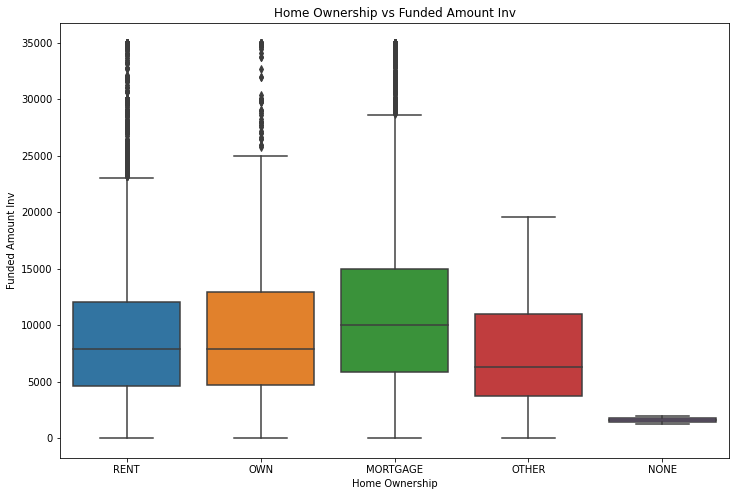

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['home_ownership'], y = df_5['funded_amnt_inv'])
plt.xlabel('Home Ownership')
plt.ylabel('Funded Amount Inv')
plt.title('Home Ownership vs Funded Amount Inv')
plt.show()

# Note: median of funded is little higher in Mortgage 

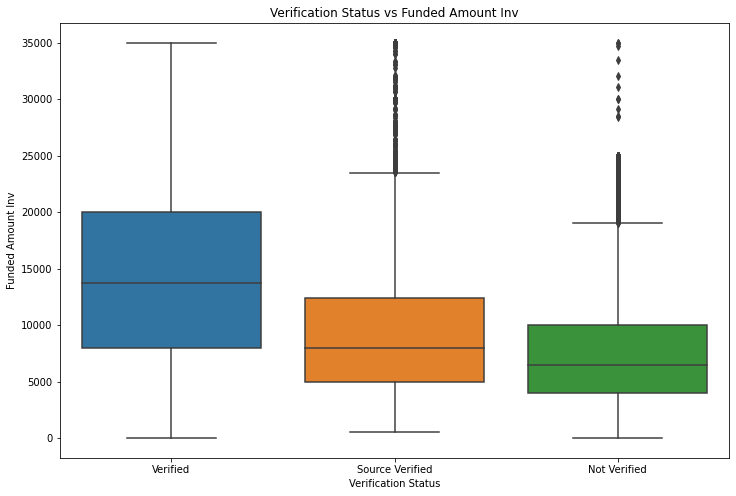

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['verification_status'], y = df_5['funded_amnt_inv'])
plt.xlabel('Verification Status')
plt.ylabel('Funded Amount Inv')
plt.title('Verification Status vs Funded Amount Inv')
plt.show()

# Note: Verified people are more well funded than others, but outlier in sourced and Not verified is strange

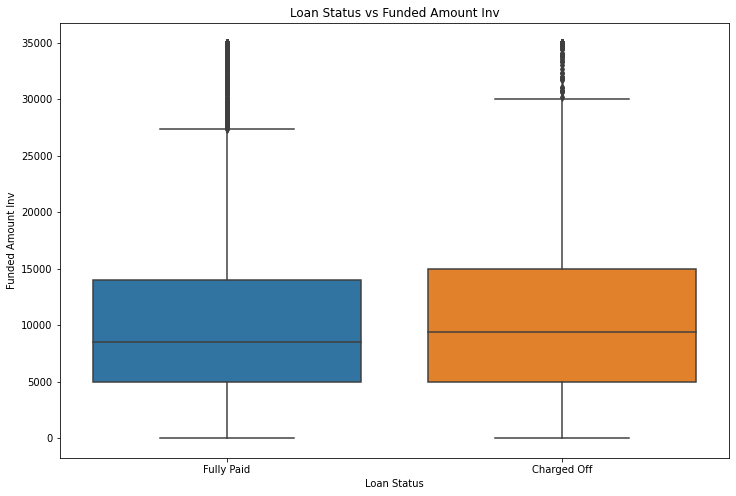

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['loan_status'], y = df_5['funded_amnt_inv'])
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount Inv')
plt.title('Loan Status vs Funded Amount Inv')
plt.show()

# Note: Outlier in both cases but need to cross check with other variables, because it's our target variable

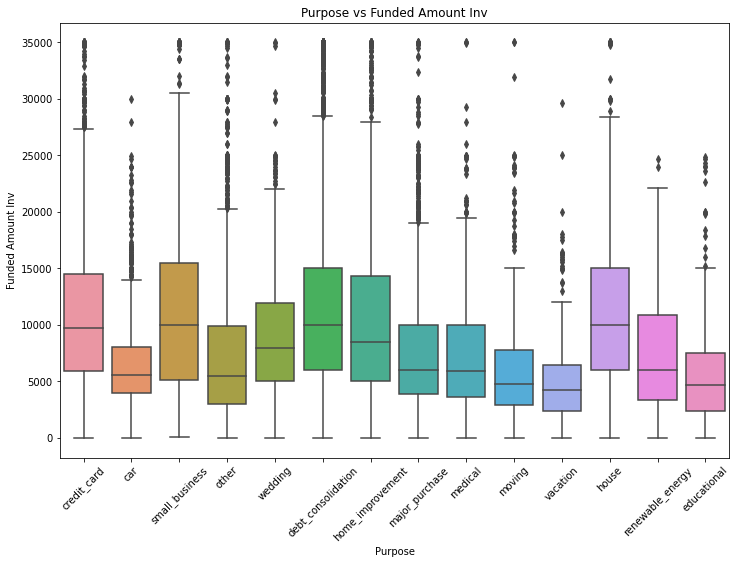

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['purpose'], y = df_5['funded_amnt_inv'])
plt.xlabel('Purpose')
plt.ylabel('Funded Amount Inv')
plt.title('Purpose vs Funded Amount Inv')
plt.xticks(rotation = 45)
plt.show()

# Note: Outlier in both case but need to cross check with other variables, because its our target variable

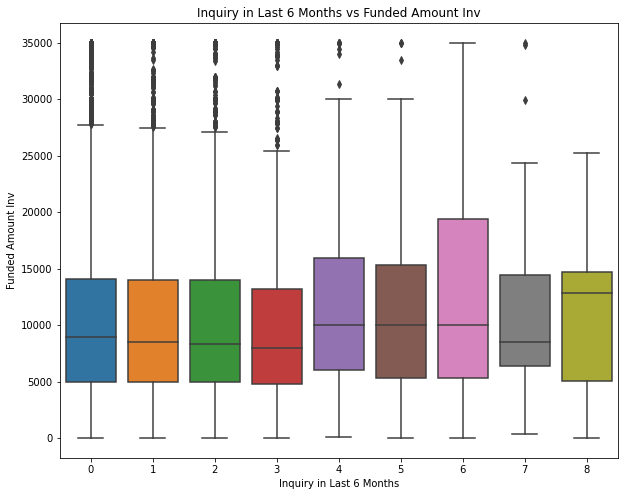

In [57]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df_5['inq_last_6mths'], y = df_5['funded_amnt_inv'])
plt.xlabel('Inquiry in Last 6 Months')
plt.ylabel('Funded Amount Inv')
plt.title('Inquiry in Last 6 Months vs Funded Amount Inv')
plt.show()

# Note: Outlier in both case but need to cross check with other variables, because its our target variable

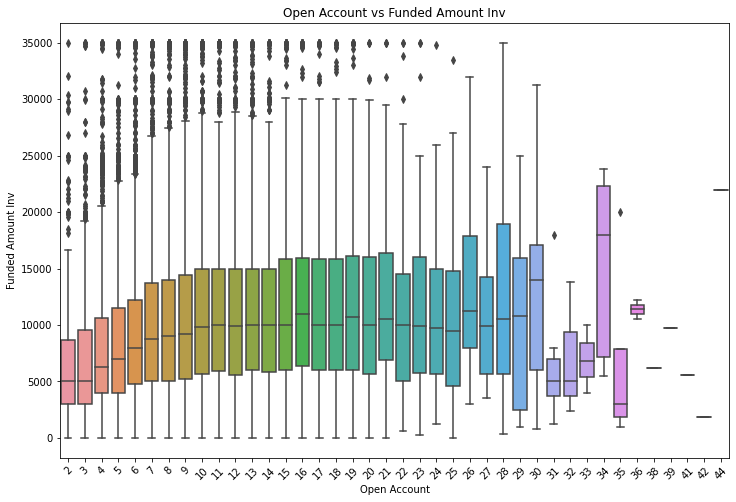

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['open_acc'], y = df_5['funded_amnt_inv'])
plt.xlabel('Open Account')
plt.ylabel('Funded Amount Inv')
plt.title('Open Account vs Funded Amount Inv')
plt.xticks(rotation = 45)
plt.show()

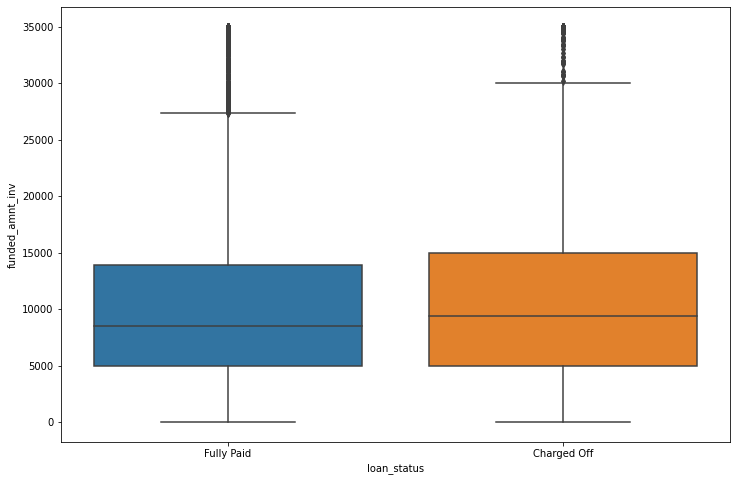

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['loan_status'], y = df_5['funded_amnt_inv'])
plt.show()

# Note: Outlier in both case but need to cross check with other variables, because its our target variable

<Figure size 864x576 with 0 Axes>

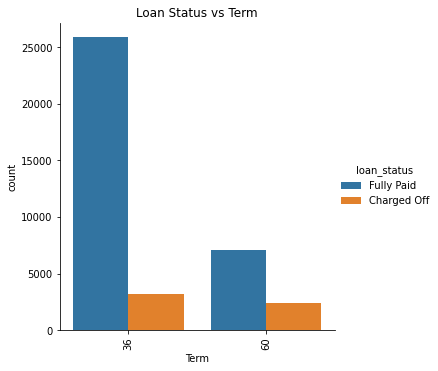

In [60]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_5,kind='count',x='term',hue='loan_status')
plt.xlabel('Term')
plt.title('Loan Status vs Term')
plt.xticks(rotation = 90)
plt.show()

In [61]:
df_5.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

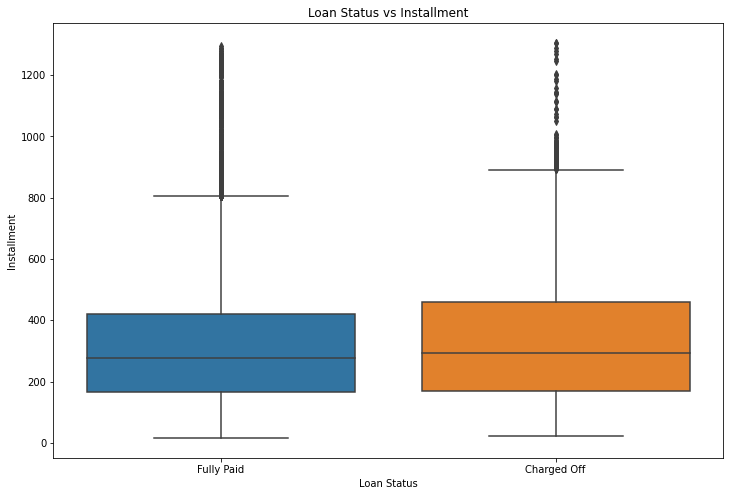

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['loan_status'], y = df_5['installment'])
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.title('Loan Status vs Installment')
plt.show()

# Note: Installment median is little high, with upper bound

<Figure size 864x576 with 0 Axes>

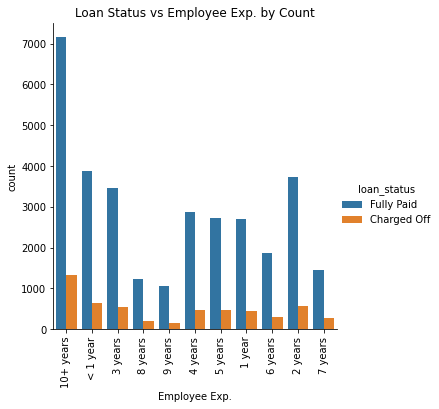

In [63]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_5,kind='count',x='emp_length',hue='loan_status')
plt.xlabel('Employee Exp.')
plt.title('Loan Status vs Employee Exp. by Count')
plt.xticks(rotation = 90)
plt.show()

<Figure size 864x576 with 0 Axes>

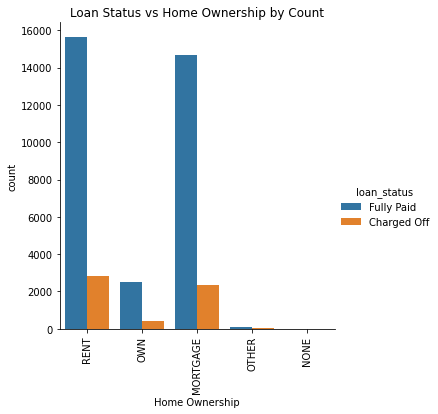

In [64]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_5,kind='count',x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.title('Loan Status vs Home Ownership by Count')
plt.xticks(rotation = 90)
plt.show()

<Figure size 864x576 with 0 Axes>

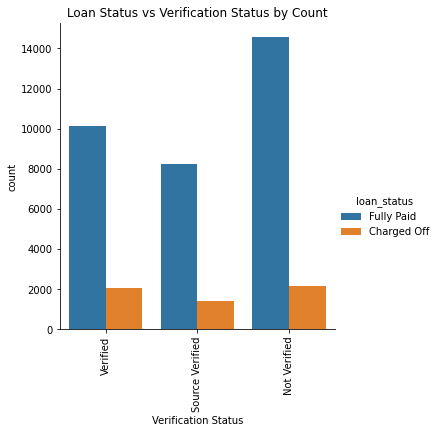

In [65]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_5,kind='count',x='verification_status',hue='loan_status')
plt.xlabel('Verification Status')
plt.title('Loan Status vs Verification Status by Count')
plt.xticks(rotation = 90)
plt.show()

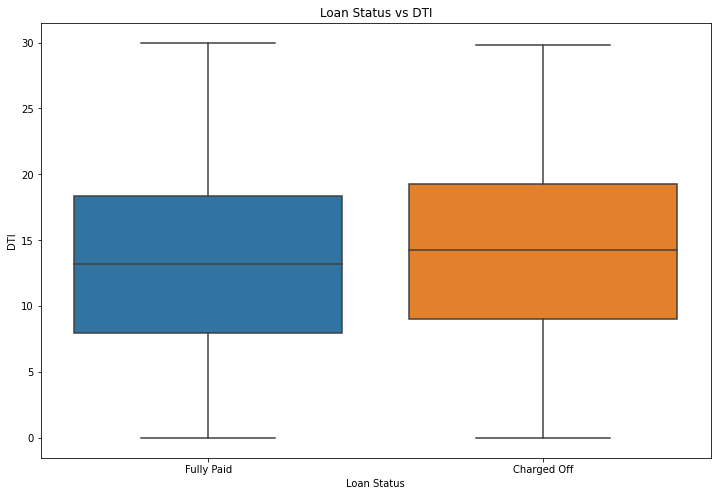

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x = df_5['loan_status'], y = df_5['dti'])
plt.xlabel('Loan Status')
plt.ylabel('DTI')
plt.title('Loan Status vs DTI')
plt.show()

<Figure size 864x576 with 0 Axes>

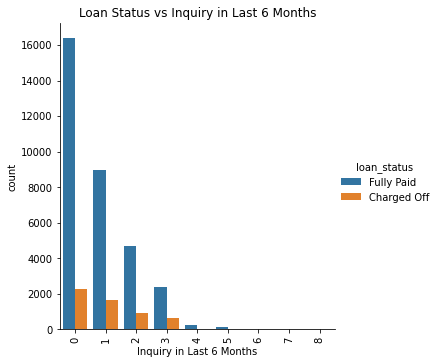

In [67]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_5,kind='count',x='inq_last_6mths',hue='loan_status')
plt.xlabel('Inquiry in Last 6 Months')
plt.title('Loan Status vs Inquiry in Last 6 Months')
plt.xticks(rotation = 90)
plt.show()

<Figure size 864x576 with 0 Axes>

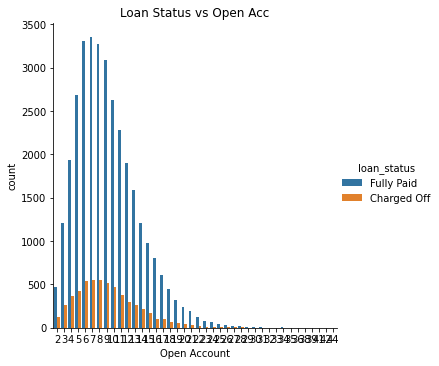

In [68]:
plt.figure(figsize=(12,8))
sns.catplot(data=df_5,kind='count',x='open_acc',hue='loan_status')
plt.xlabel("Open Account")
plt.title('Loan Status vs Open Acc')
#plt.xticks(rotation = 90)
plt.show()

In [69]:
(df_5[df_5['loan_status'] == "Charged Off"].groupby(['emp_length','loan_status'])\
 ['loan_status'].count()/len(df_5)) * 100

# Its strange to see that peoples with 10+ experience having higher chance of default

emp_length  loan_status
1 year      Charged Off    1.182051
10+ years   Charged Off    3.450242
2 years     Charged Off    1.469788
3 years     Charged Off    1.438681
4 years     Charged Off    1.197605
5 years     Charged Off    1.187236
6 years     Charged Off    0.795811
7 years     Charged Off    0.681753
8 years     Charged Off    0.526220
9 years     Charged Off    0.409570
< 1 year    Charged Off    1.656427
Name: loan_status, dtype: float64

In [70]:
(df_5[df_5['loan_status'] == "Charged Off"].groupby(['purpose','loan_status'])\
 ['loan_status'].count()/len(df_5)) * 100

# Its strange to see that peoples with 10+ experience having higher chance of default

purpose             loan_status
car                 Charged Off    0.414755
credit_card         Charged Off    1.404982
debt_consolidation  Charged Off    7.172668
educational         Charged Off    0.145164
home_improvement    Charged Off    0.899500
house               Charged Off    0.152941
major_purchase      Charged Off    0.575472
medical             Charged Off    0.274775
moving              Charged Off    0.238484
other               Charged Off    1.640874
renewable_energy    Charged Off    0.049252
small_business      Charged Off    1.231304
vacation            Charged Off    0.137388
wedding             Charged Off    0.248853
Name: loan_status, dtype: float64

In [71]:
(df_5[df_5['loan_status'] == "Charged Off"].groupby(['verification_status','loan_status'])\
 ['loan_status'].count()/len(df_5)) * 100

# Its strange that people having Verified & Not Verfied both having same percentage of Default.

verification_status  loan_status
Not Verified         Charged Off    5.552531
Source Verified      Charged Off    3.717241
Verified             Charged Off    5.316639
Name: loan_status, dtype: float64

In [72]:
(df_5[df_5['loan_status'] == "Charged Off"].groupby(['inq_last_6mths','loan_status'])\
 ['loan_status'].count()/len(df_5)) * 100

# Its strange that as credit inquiry increase, chances of default decrease

inq_last_6mths  loan_status
0               Charged Off    5.910257
1               Charged Off    4.347150
2               Charged Off    2.444462
3               Charged Off    1.604583
4               Charged Off    0.132203
5               Charged Off    0.072582
6               Charged Off    0.041475
7               Charged Off    0.025922
8               Charged Off    0.007777
Name: loan_status, dtype: float64